In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [27]:
# Load the cleaned DataFrame
df_jobs_cleaned = pd.read_csv("df_jobs_cleaned.csv")

In [28]:
# Select quantitative columns for PCA
quantitative_columns = ['SalaryMin', 'SalaryMax', 'VacancyDuration']
df_quantitative = df_jobs_cleaned[quantitative_columns].dropna()

In [29]:
output_filename = "df_quantitative.csv"
df_quantitative.to_csv(output_filename, index=False)

print(f"DataFrame saved as {output_filename}")

DataFrame saved as df_quantitative.csv


In [30]:
print(df_quantitative)

      SalaryMin  SalaryMax  VacancyDuration
0       59319.0   152771.0              365
1      120246.0   156323.0              294
2       64649.0   172500.0              364
3       38560.0   123652.0              364
4      100000.0   145000.0               11
...         ...        ...              ...
8395    59966.0    88786.0              365
8396    59966.0    79050.0              365
8397    88324.0   114818.0               95
8398    35286.0    57607.0              343
8399    39576.0    85844.0              187

[8400 rows x 3 columns]


In [31]:
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_quantitative)

In [32]:
# Save the prepared data for PCA to a CSV file
pca_output_filename = "df_jobs_pca_ready.csv"
pd.DataFrame(df_standardized, columns=quantitative_columns).to_csv(pca_output_filename, index=False)

In [33]:
# Perform PCA with n_components=2
pca_2 = PCA(n_components=2)
df_pca_2 = pca_2.fit_transform(df_standardized)

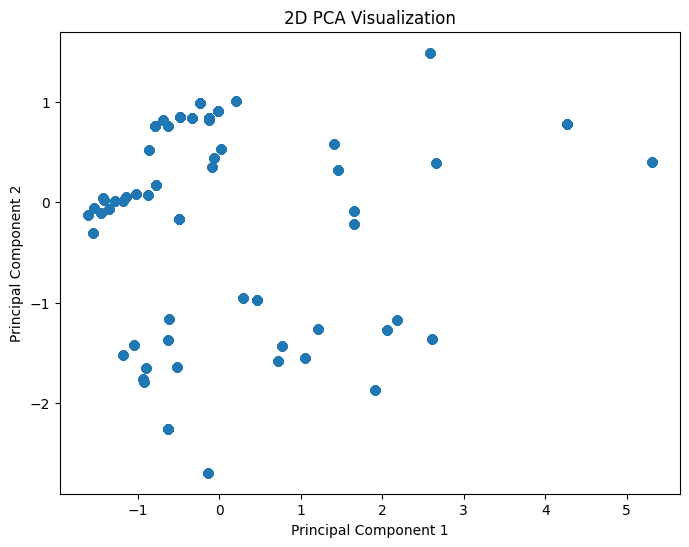

In [34]:
# Visualize the 2D PCA results
plt.figure(figsize=(8, 6))
plt.scatter(df_pca_2[:, 0], df_pca_2[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization')
plt.savefig("pca_2d_visualization.png")
plt.show()

In [35]:
# Perform PCA with n_components=3
pca_3 = PCA(n_components=3)
df_pca_3 = pca_3.fit_transform(df_standardized)

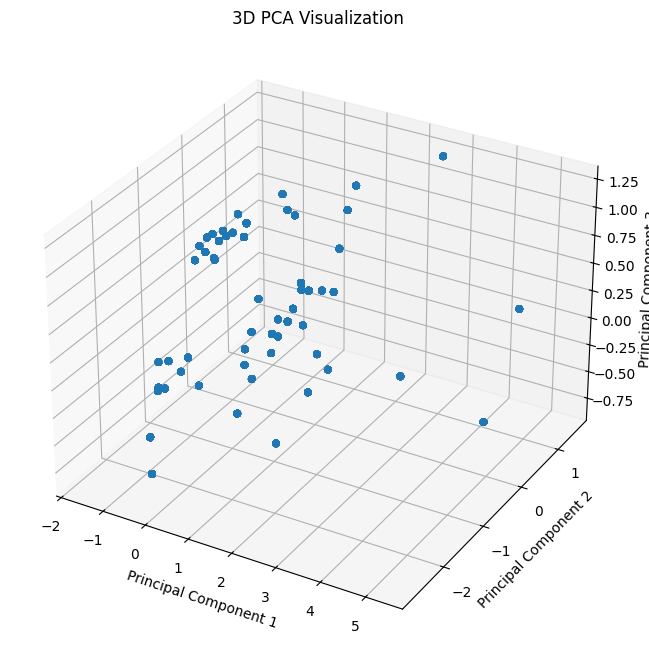

In [36]:
# Visualize the 3D PCA results
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_3[:, 0], df_pca_3[:, 1], df_pca_3[:, 2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Visualization')
plt.savefig("pca_3d_visualization.png")
plt.show()

In [37]:
# Print the explained variance ratio for n_components=2
explained_variance_2 = pca_2.explained_variance_ratio_
cumulative_variance_2 = explained_variance_2.sum()
print(f"Explained variance ratio for 2 components: {explained_variance_2}")
print(f"Cumulative explained variance for 2 components: {cumulative_variance_2 * 100:.2f}%")

Explained variance ratio for 2 components: [0.58616317 0.33976968]
Cumulative explained variance for 2 components: 92.59%


In [38]:
# Print the explained variance ratio for n_components=3
explained_variance_3 = pca_3.explained_variance_ratio_
cumulative_variance_3 = explained_variance_3.sum()
print(f"Explained variance ratio for 3 components: {explained_variance_3}")
print(f"Cumulative explained variance for 3 components: {cumulative_variance_3 * 100:.2f}%")

Explained variance ratio for 3 components: [0.58616317 0.33976968 0.07406715]
Cumulative explained variance for 3 components: 100.00%


In [39]:
pca_full = PCA()
pca_full.fit(df_standardized)
cumulative_variance_full = pca_full.explained_variance_ratio_.cumsum()

In [40]:
n_components_95 = (cumulative_variance_full >= 0.95).argmax() + 1
print(f"Number of components needed to retain at least 95% of the variance: {n_components_95}")

Number of components needed to retain at least 95% of the variance: 3


In [41]:
print(f"Explained variance ratio for all components: {pca_full.explained_variance_ratio_}")
print(f"Cumulative variance for all components: {cumulative_variance_full}")

Explained variance ratio for all components: [0.58616317 0.33976968 0.07406715]
Cumulative variance for all components: [0.58616317 0.92593285 1.        ]


In [42]:
eigenvalues = pca_full.explained_variance_
print(f"Top three eigenvalues: {eigenvalues[:3]}")

Top three eigenvalues: [1.75869888 1.01943041 0.2222279 ]
